In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('C:\\Programming\\coding\\Pwskills\\Excel files\\diabetes.csv')


In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
df.shape

(768, 9)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


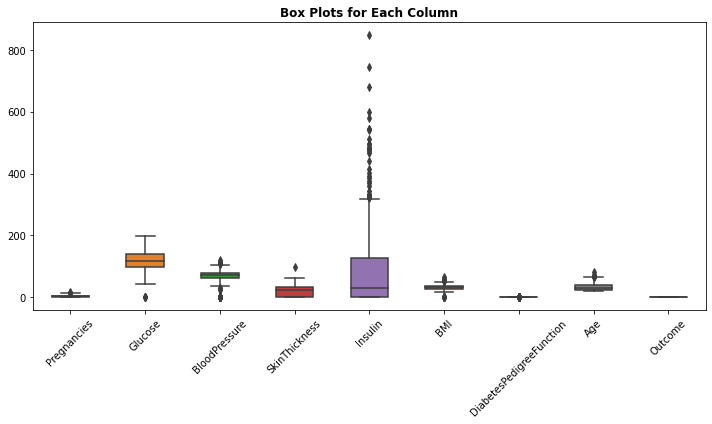

In [104]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, width=0.5)

plt.title('Box Plots for Each Column', fontweight='bold')
plt.xticks(rotation=45)  # Adjust the rotation of x-axis labels for better readability

plt.tight_layout()
plt.show()


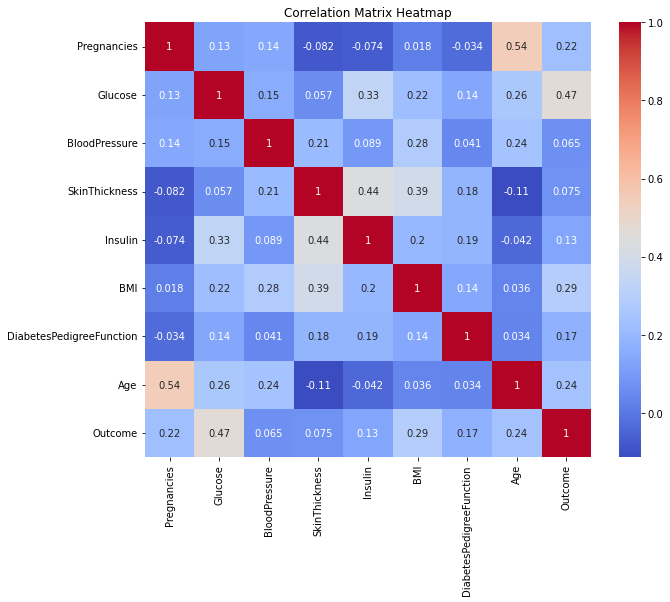

In [105]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

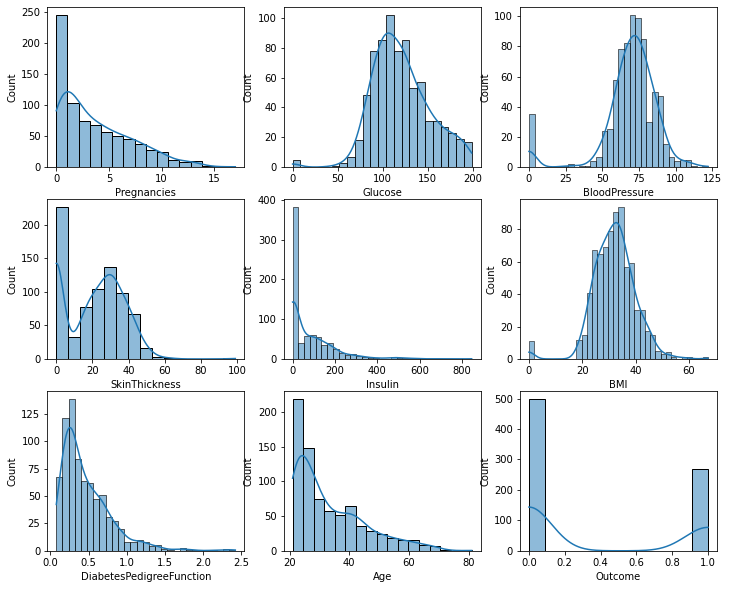

In [106]:
plt.figure(figsize=(12, 10))
x=1
for i in df.columns:
    plt.subplot(3,3,x)
    sns.histplot(df[i],kde=True)
    x+=1

In [107]:
# from scipy import stats

# z_scores = stats.zscore(df)
# df = df[(np.abs(z_scores) < 3).all(axis=1)]

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a condition to filter out outliers
condition = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to filter the DataFrame
df = df[condition]



In [108]:
df.shape

(639, 9)

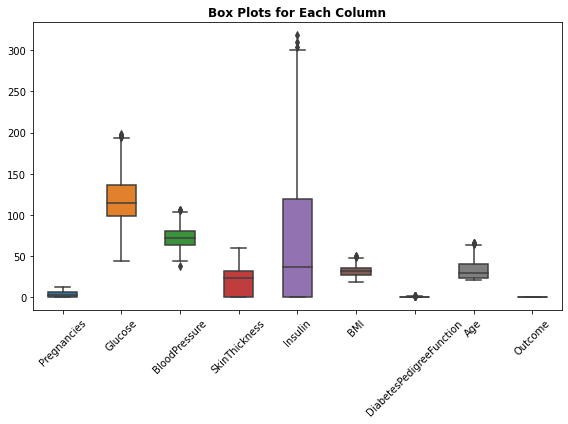

In [109]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df, width=0.5)

plt.title('Box Plots for Each Column', fontweight='bold')
plt.xticks(rotation=45)  # Adjust the rotation of x-axis labels for better readability

plt.tight_layout()
plt.show()


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")

In [111]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [112]:
x.shape,y.shape

((639, 8), (639,))

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Define the hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5, 10, 15],
    'max_features' : ["auto", "sqrt", "log2",None]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_estimator.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Best Model Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': None}
Best Model Accuracy on Test Set: 0.7578125


In [122]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini',max_depth=2,max_features='log2')

In [123]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='log2')

[Text(0.5, 0.8333333333333334, 'x[5] <= 30.3\ngini = 0.436\nsamples = 511\nvalue = [347, 164]'),
 Text(0.25, 0.5, 'x[1] <= 103.5\ngini = 0.258\nsamples = 210\nvalue = [178, 32]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.024\nsamples = 84\nvalue = [83, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.371\nsamples = 126\nvalue = [95, 31]'),
 Text(0.75, 0.5, 'x[7] <= 30.5\ngini = 0.492\nsamples = 301\nvalue = [169, 132]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.418\nsamples = 151\nvalue = [106, 45]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.487\nsamples = 150\nvalue = [63, 87]')]

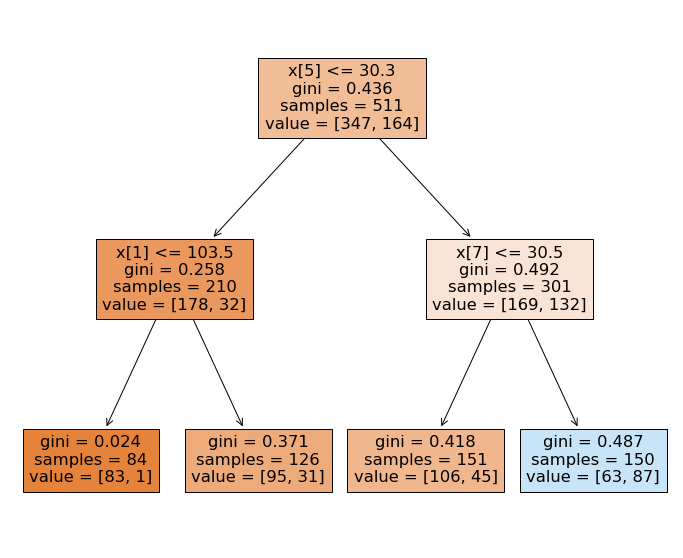

In [124]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dt_classifier,filled  = True)

In [125]:
ypred = dt_classifier.predict(X_test)

In [126]:
z = confusion_matrix(y_test,ypred)

In [127]:
confusion_matrix(y_test,ypred)

array([[77, 15],
       [18, 18]], dtype=int64)

In [128]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        92
           1       0.55      0.50      0.52        36

    accuracy                           0.74       128
   macro avg       0.68      0.67      0.67       128
weighted avg       0.74      0.74      0.74       128



<Axes: >

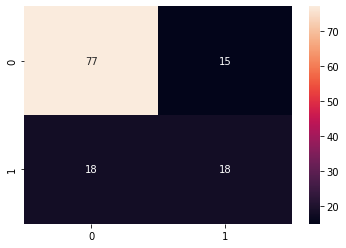

In [129]:
sns.heatmap(z,annot= True)

Let's interpret the decision tree and then discuss the model validation results.

### Q6. Interpret the Decision Tree:

The decision tree you provided has several nodes with associated splits and Gini indices. Let's break down the first few nodes to illustrate the interpretation:

1. **Node 1:**
   - Split: `BMI <= 30.3`
   - Gini Index: 0.436
   - Samples: 511
   - Class Distribution: [347 Non-Diabetic, 164 Diabetic]

2. **Node 2 (Child of Node 1):**
   - Split: `Glucose <= 103.5`
   - Gini Index: 0.258
   - Samples: 210
   - Class Distribution: [178 Non-Diabetic, 32 Diabetic]

3. **Node 3 (Child of Node 2):**
   - Gini Index: 0.024
   - Samples: 84
   - Class Distribution: [83 Non-Diabetic, 1 Diabetic]

4. **Node 4 (Child of Node 2):**
   - Gini Index: 0.371
   - Samples: 126
   - Class Distribution: [95 Non-Diabetic, 31 Diabetic]

5. **Node 5 (Child of Node 1):**
   - Split: `Age <= 30.5`
   - Gini Index: 0.492
   - Samples: 301
   - Class Distribution: [169 Non-Diabetic, 132 Diabetic]

6. **Node 6 (Child of Node 5):**
   - Gini Index: 0.418
   - Samples: 151
   - Class Distribution: [106 Non-Diabetic, 45 Diabetic]

7. **Node 7 (Child of Node 5):**
   - Gini Index: 0.487
   - Samples: 150
   - Class Distribution: [63 Non-Diabetic, 87 Diabetic]

**Interpretation:**
- The tree is making decisions based on variables such as BMI, Glucose, and Age.
- The Gini Index measures the impurity of each node, with lower values indicating more homogeneous classes.
- Nodes closer to the root (e.g., Node 1) contribute more to the overall decision.

### Q7. Model Validation:

The classification report and confusion matrix provide insights into the model's performance on new data.

- **Classification Report:**
  - **Precision:** The proportion of true positive predictions among all positive predictions.
  - **Recall:** The proportion of true positive predictions among all actual positives.
  - **F1-score:** A balance between precision and recall.
  - **Support:** The number of actual occurrences of each class.

- **Confusion Matrix:**
  - Diagonal elements represent correct predictions.
  - Off-diagonal elements represent misclassifications.

```plaintext
precision    recall  f1-score   support
0       0.81      0.84      0.82        92
1       0.55      0.50      0.52        36
accuracy                           0.74       128
```

**Interpretation:**
- Overall accuracy is 74%, meaning the model correctly predicts the outcome for 74% of the samples.
- Precision, recall, and F1-score provide class-specific performance metrics.
- Class 0 (Non-Diabetic) has higher precision, recall, and F1-score, indicating better performance for this class.
- Class 1 (Diabetic) has lower precision, recall, and F1-score, suggesting the model's struggle to correctly identify diabetics.

**Confusion Matrix:**
```plaintext
array([[77, 15],
       [18, 18]], dtype=int64)
```

**Interpretation:**
- True Positive (TP): 18 Diabetic cases correctly identified.
- True Negative (TN): 77 Non-Diabetic cases correctly identified.
- False Positive (FP): 15 Non-Diabetic cases incorrectly classified as Diabetic.
- False Negative (FN): 18 Diabetic cases incorrectly classified as Non-Diabetic.

**Precision:**

Class 0 (Non-Diabetic): Precision is 0.81.
81% of the predicted non-diabetic cases are actually non-diabetic.
Class 1 (Diabetic): Precision is 0.55.
55% of the predicted diabetic cases are actually diabetic.
Overall: Precision is a measure of the accuracy of positive predictions for each class.

**Recall (Sensitivity):**

Class 0 (Non-Diabetic): Recall is 0.84.
84% of the actual non-diabetic cases are correctly identified.
Class 1 (Diabetic): Recall is 0.50.
50% of the actual diabetic cases are correctly identified.
Overall: Recall measures the model's ability to capture all positive instances for each class.

**F1 Score:**

Class 0 (Non-Diabetic): F1 score is 0.82.
The harmonic mean of precision and recall for non-diabetic class.
Class 1 (Diabetic): F1 score is 0.52.
The harmonic mean of precision and recall for diabetic class.
Overall: F1 score provides a balanced measure considering both precision and recall for each class.
